In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Markdown
import textwrap


In [61]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [31]:
df=pd.read_csv('output.csv') #read data 

In [32]:
df.drop_duplicates(subset='Question',inplace=True) # drop duplicates Question

In [51]:
df.head()

,Question,Response,Sentiment
0,why you are so sad?,Life's burdens weigh heavy upon my weary soul.,negative
1,what is ipl,"IPL stands for Indian Premier League, a popula...",neutral
3,hy how are you?,"I am well, thank you.",positive
4,How was your day?,"Today has been a whirlwind of emotions, a roll...",positive
5,What's your favorite memory?,Watching the sunset on the beach with my loved...,positive


Calculate total count of sentiments

In [33]:
total_sentiments = df['Sentiment'].count()
total_sentiments

54

# Calculate sentiment distribution

In [34]:
sentiment_distribution = df['Sentiment'].value_counts(normalize=True) * 100
sentiment_distribution

Sentiment
positive    72.222222
neutral     14.814815
negative    12.962963
Name: proportion, dtype: float64

In [69]:
def plot_sentiment_distribution(df, sentiment_distribution):
    plt.figure(figsize=(10, 6))
    plt.suptitle('Sentiment Distribution', fontsize=16, fontweight='bold')

    custom_palette = ['#FFB27F', '#BFFF7F', '#AFAFBF', '#FFFB7F', '#FF7FFF']

    sns.set(style='darkgrid')

    # Plotting the sentiment distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=df['Sentiment'], palette=custom_palette)
    plt.title('Count Plot of Sentiment', fontsize=14)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().spines['top'].set_visible(False)  # Remove top border
    plt.gca().spines['right'].set_visible(False)  # Remove right border

    # Plotting a pie chart for sentiment distribution
    plt.subplot(1, 2, 2)
    labels = sentiment_distribution.index
    colors = custom_palette

    plt.pie(sentiment_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
            wedgeprops={'edgecolor': 'white'}, pctdistance=0.6, textprops={'rotation': 30, 'ha': 'center', 'va': 'center'})

    plt.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))  # Add a white circle to create a donut-like appearance
    plt.title('Pie Chart of Sentiment', fontsize=14)

    # Add legend using the labels from count plot
    plt.legend(labels, loc='upper right')

    plt.tight_layout()
    plt.show()


C:\Users\shukl\AppData\Local\Temp\ipykernel_13124\2862235827.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette=custom_palette)
C:\Users\shukl\AppData\Local\Temp\ipykernel_13124\2862235827.py:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x=df['Sentiment'], palette=custom_palette)


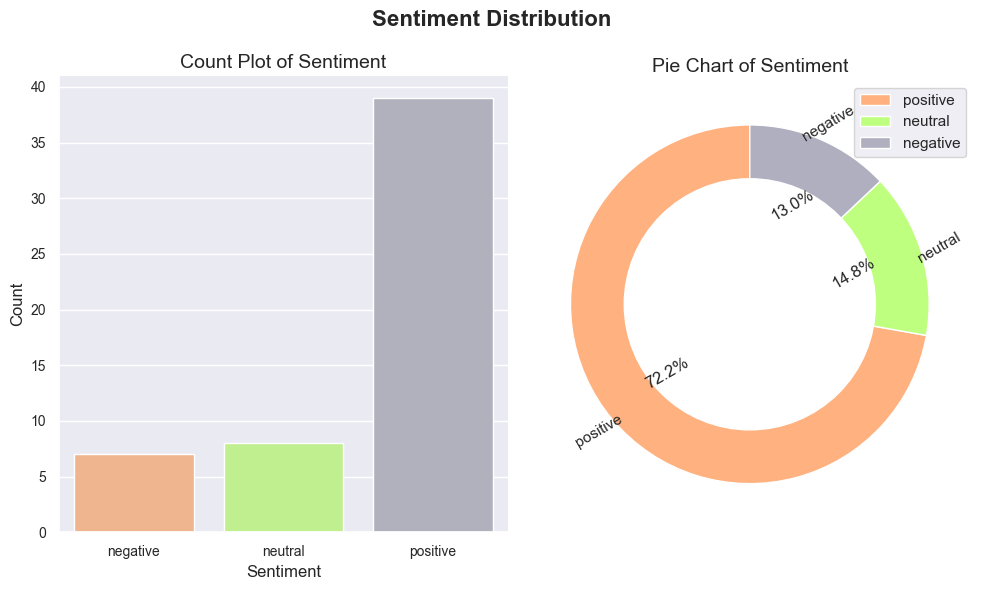

In [70]:
plot_sentiment_distribution(df, sentiment_distribution)


In [73]:
# Calculate total count of sentiments
total_sentiments = df['Sentiment'].count()

# Calculate sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts(normalize=True) * 100

# Calculate sentiment insights
positive_insights = df[df['Sentiment'] == 'positive']['Response'].sample(n=3).tolist()
negative_insights = df[df['Sentiment'] == 'negative']['Response'].sample(n=3).tolist()
neutral_insights = df[df['Sentiment'] == 'neutral']['Response'].sample(n=3).tolist()

# Prepare the report
report = f"""
**Sentiment Analysis Report**

**Date: 21-04-2024**

**Dataset Overview:**

- Total number of texts/documents analyzed: {total_sentiments}
- Sources/types of texts: [e.g., social media posts, customer reviews, news articles]

**Sentiment Distribution:**

- Positive Sentiments: {sentiment_distribution.get('positive', 0):.2f}%
- Negative Sentiments: {sentiment_distribution.get('negative', 0):.2f}%
- Neutral Sentiments: {sentiment_distribution.get('neutral', 0):.2f}%


**Sentiment Analysis Insights:**

1. **Positive Sentiments:**
   - {positive_insights[0]}
   - {positive_insights[1]}
   - {positive_insights[2]}

2. **Negative Sentiments:**
   - {negative_insights[0]}
   - {negative_insights[1]}
   - {negative_insights[2]}

3. **Neutral Sentiments:**
   - {neutral_insights[0]}
   - {neutral_insights[1]}
   - {neutral_insights[2]}

**Key Findings:**
- According to the model's predictions, approximately `72%` of sentiments are positive
- neutral and negative sentiments account for roughly `14.8%` and `13%` respectively.



**Recommendations:**

- Due to the small dataset size and the tendency of the LLM model to generate positive sentiment statements for various questions, it's crucial to enhance result accuracy.
- Implement fine-tuning of a classification model using our dataset to address this challenge effectively.
- Fine-tuning the model can significantly improve accuracy, leading to more reliable outcomes.

**Conclusion:**

In conclusion, the analysis underscores the importance of addressing the limitations posed by the small dataset and the predisposition of the LLM model towards positive sentiment responses. By leveraging fine-tuning techniques with a classification model, there exists a promising avenue to substantially enhance result accuracy. This proactive approach not only mitigates potential biases but also ensures more dependable and precise outcomes in sentiment analysis tasks.
"""




In [72]:
to_markdown(report)

> 
> **Sentiment Analysis Report**
> 
> **Date: 21-04-2024**
> 
> **Dataset Overview:**
> 
> - Total number of texts/documents analyzed: 54
> - Sources/types of texts: [e.g., social media posts, customer reviews, news articles]
> 
> **Sentiment Distribution:**
> 
> - Positive Sentiments: 72.22%
> - Negative Sentiments: 12.96%
> - Neutral Sentiments: 14.81%
> 
> None
> 
> 
> **Sentiment Analysis Insights:**
> 
> 1. **Positive Sentiments:**
>    - In the face of adversity, I am like a willow tree, bending but not breaking.
>    - Setbacks are stepping stones to success.
>    - I welcome negative feedback as an opportunity for growth and improvement.
> 
> 2. **Negative Sentiments:**
>    - Yes, I often feel anxious, particularly in uncertain or stressful situations.
>    - Injustice ignites a fire within me, fueling a resolute determination to fight for what is right.
>    - I fear the unknown and the unpredictable.
> 
> 3. **Neutral Sentiments:**
>    - Change is inevitable, embrace it or be left behind.
>    - Forgiveness is not forgetting, but it is choosing to let go of the hurt and anger that binds us.
>    - Expressing emotions comes naturally to me.
> 
> **Key Findings:**
> - According to the model's predictions, approximately `72%` of sentiments are positive
> - neutral and negative sentiments account for roughly `14.8%` and `13%` respectively.
> 
> 
> 
> **Recommendations:**
> 
> - Due to the small dataset size and the tendency of the LLM model to generate positive sentiment statements for various questions, it's crucial to enhance result accuracy.
> - Implement fine-tuning of a classification model using our dataset to address this challenge effectively.
> - Fine-tuning the model can significantly improve accuracy, leading to more reliable outcomes.
> 
> **Conclusion:**
> 
> In conclusion, the analysis underscores the importance of addressing the limitations posed by the small dataset and the predisposition of the LLM model towards positive sentiment responses. By leveraging fine-tuning techniques with a classification model, there exists a promising avenue to substantially enhance result accuracy. This proactive approach not only mitigates potential biases but also ensures more dependable and precise outcomes in sentiment analysis tasks.
